<a href="https://colab.research.google.com/github/Hengameh1392/Health/blob/main/Sample_Project_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [3]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


About Dataset

Apple annual/quarterly revenue history and growth rate from 1980 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services. Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.
Apple revenue for the quarter ending June 30, 2022 was $82.959B, a 1.87% increase year-over-year.
Apple revenue for the twelve months ending June 30, 2022 was $387.542B, a 11.63% increase year-over-year.
Apple annual revenue for 2021 was $365.817B, a 33.26% increase from 2020.
Apple annual revenue for 2020 was $274.515B, a 5.51% increase from 2019.
Apple annual revenue for 2019 was $260.174B, a 2.04% decline from 2018.

Detail about data: 

applerevenue.csv helps to explore data of stocks changes of a big company here the data is in different columns
the columns are:
date-date that specified
open-starting rate of the stock for that day
high-the highest rate of that day
low-the low rate of that stock at particular day
close-the final price or rate of that stock for that at the time closing
volume-the quantity

https://www.kaggle.com/datasets/meerashareef/apple-revenue-from-1980-to-2022

In [7]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Hengameh1392/Health/main/applerevenue5.csv')
df.head(25)

date    open    high     low   close     volume  profit or not
0   12-12-1980  0.1003  0.1007  0.1003  0.1003  469033600              0
1   15-12-1980  0.0955  0.0955  0.0951  0.0951  175884800              1
2   16-12-1980  0.0885  0.0885  0.0881  0.0881  105728000              1
3   17-12-1980  0.0902  0.0907  0.0902  0.0902   86441600              0
4   18-12-1980  0.0929  0.0933  0.0929  0.0929   73449600              0
5   19-12-1980  0.0985  0.0990  0.0985  0.0985   48630400              0
6   22-12-1980  0.1034  0.1038  0.1034  0.1034   37363200              0
7   23-12-1980  0.1077  0.1081  0.1077  0.1077   46950400              0
8   24-12-1980  0.1134  0.1138  0.1134  0.1134   48003200              0
9   26-12-1980  0.1238  0.1243  0.1238  0.1238   55574400              0
10  29-12-1980  0.1256  0.1260  0.1256  0.1256   93161600              0
11  30-12-1980  0.1230  0.1230  0.1225  0.1225   68880000              1
12  31-12-1980  0.1195  0.1195  0.1191  0.1191   35750400              1
13  02-01-1981  0.1203  0.1212  0.1203  0.1203   21660800              0
14  05-01-1981  0.1181  0.1181  0.1177  0.1177   35728000              1
15  06-01-1981  0.1129  0.1129  0.1125  0.1125   45158400              1
16  07-01-1981  0.1081  0.1081  0.1077  0.1077   55686400              1
17  08-01-1981  0.1059  0.1059  0.1055  0.1055   39827200              1
18  09-01-1981  0.1112  0.1116  0.1112  0.1112   21504000              0
19  12-01-1981  0.1112  0.1112  0.1103  0.1103   23699200              1
20  13-01-1981  0.1068  0.1068  0.1064  0.1064   23049600              1
21  14-01-1981  0.1068  0.1073  0.1068  0.1068   14291200              0
22  15-01-1981  0.1090  0.1099  0.1090  0.1090   14067200              0
23  16-01-1981  0.1086  0.1086  0.1081  0.1081   13395200              1
24  19-01-1981  0.1147  0.1151  0.1147  0.1147   41574400              0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10559 entries, 0 to 10558
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           10559 non-null  object 
 1   open           10559 non-null  float64
 2   high           10559 non-null  float64
 3   low            10559 non-null  float64
 4   close          10559 non-null  float64
 5   volume         10559 non-null  int64  
 6   profit or not  10559 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 577.6+ KB


In [9]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [10]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

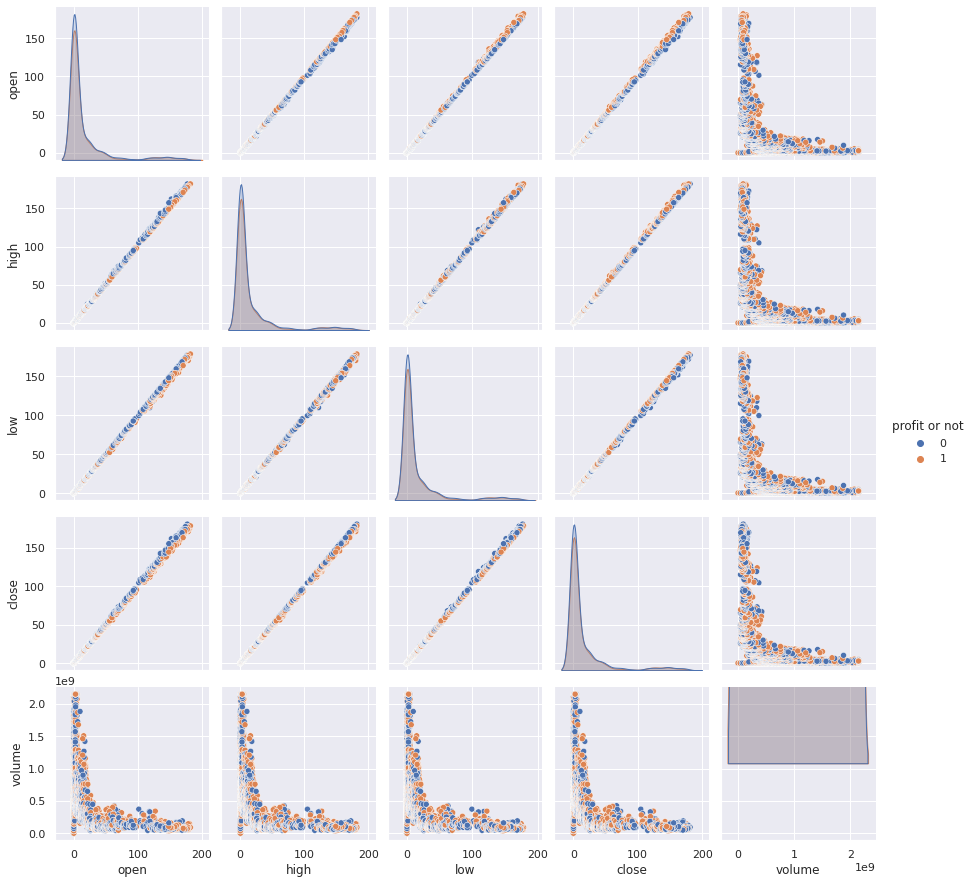

In [12]:
sns.pairplot(df, hue='profit or not')
plt.show()

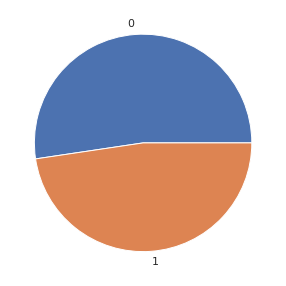

In [13]:
y =df['profit or not']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [15]:
X = df.drop(columns=['profit or not'])
X.head(10)

date    open    high     low   close     volume
0  12-12-1980  0.1003  0.1007  0.1003  0.1003  469033600
1  15-12-1980  0.0955  0.0955  0.0951  0.0951  175884800
2  16-12-1980  0.0885  0.0885  0.0881  0.0881  105728000
3  17-12-1980  0.0902  0.0907  0.0902  0.0902   86441600
4  18-12-1980  0.0929  0.0933  0.0929  0.0929   73449600
5  19-12-1980  0.0985  0.0990  0.0985  0.0985   48630400
6  22-12-1980  0.1034  0.1038  0.1034  0.1034   37363200
7  23-12-1980  0.1077  0.1081  0.1077  0.1077   46950400
8  24-12-1980  0.1134  0.1138  0.1134  0.1134   48003200
9  26-12-1980  0.1238  0.1243  0.1238  0.1238   55574400

In [16]:
X.describe().transpose()

count          mean           std           min           25%  \
open    10559.0  1.530883e+01  3.397311e+01  3.880000e-02  2.368000e-01   
high    10559.0  1.548309e+01  3.438580e+01  3.880000e-02  2.425000e-01   
low     10559.0  1.513937e+01  3.358097e+01  3.840000e-02  2.316500e-01   
close   10559.0  1.531801e+01  3.400079e+01  3.840000e-02  2.369000e-01   
volume  10559.0  3.263275e+08  3.201156e+08  1.001504e+06  1.219792e+08   

                 50%           75%           max  
open    4.002000e-01  1.365270e+01  1.818779e+02  
high    4.066000e-01  1.378330e+01  1.821866e+02  
low     3.930000e-01  1.350400e+01  1.783824e+02  
close   3.993000e-01  1.364715e+01  1.812605e+02  
volume  2.159780e+08  4.074518e+08  2.147484e+09

**Standardize the Data**

In [17]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

ValueError: ignored

In [ ]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
AR  210.0 -5.392512e-17  1.002389 -1.466714 -0.887955 -0.169674  0.846599   
PR  210.0  9.146123e-17  1.002389 -1.649686 -0.851433 -0.183664  0.887069   
CP  210.0  1.322091e-15  1.002389 -2.668236 -0.598079  0.103993  0.711677   
LK  210.0 -2.182910e-15  1.002389 -1.650501 -0.828682 -0.237628  0.794595   
WD  210.0 -2.030122e-16  1.002389 -1.668209 -0.834907 -0.057335  0.804496   
AS  210.0 -3.679596e-16  1.002389 -1.956769 -0.759148 -0.067469  0.712379   
LG  210.0 -1.337554e-16  1.002389 -1.813288 -0.740495 -0.377459  0.956394   

         max  
AR  2.181534  
PR  2.065260  
CP  2.006586  
LK  2.367533  
WD  2.055112  
AS  3.170590  
LG  2.328998

**Observations and variables**

In [18]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

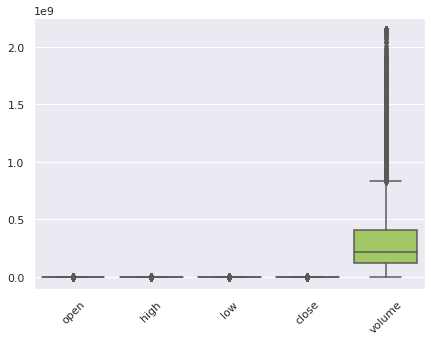

In [19]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

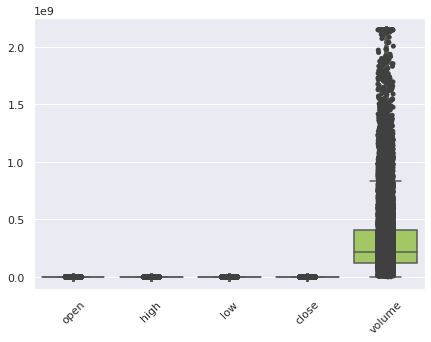

In [20]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

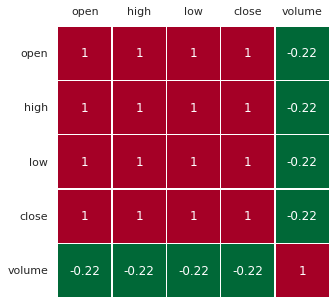

In [21]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

In [22]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

ValueError: ignored

**Eigenvectors**

In [23]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


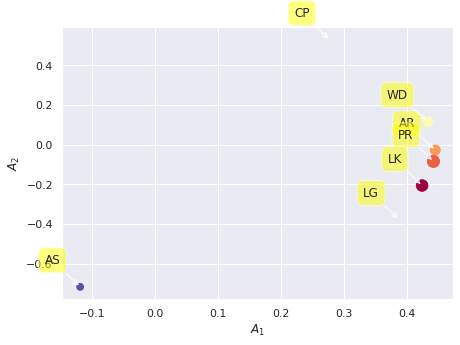

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

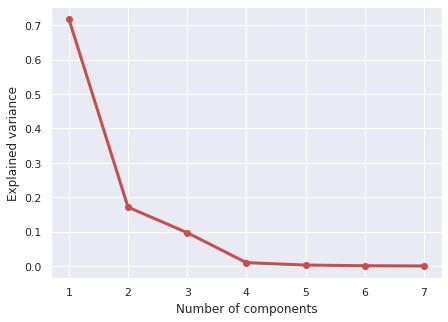

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

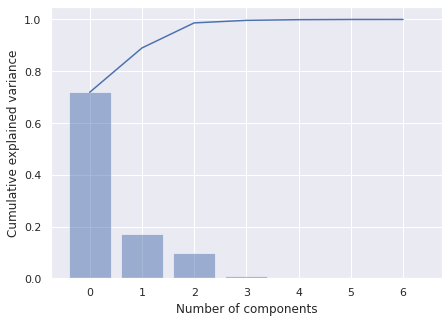

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

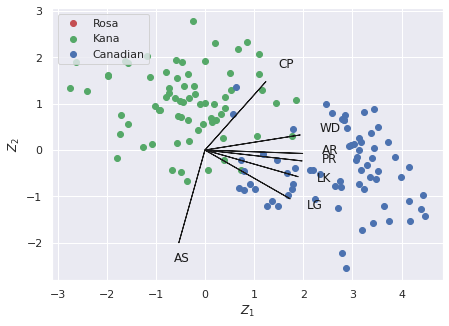

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

##**Using PCA Library**

In [ ]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=8c971d5098f445acbfb8210e9a2a3455f0e942f9ae720aec97101d9557bf091f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3
0    0.317047  0.783669 -0.631010
1   -0.003386  1.913214 -0.669754
2   -0.459443  1.907225  0.932489
3   -0.591936  1.931069  0.499311
4    1.102910  2.068090  0.056705
..        ...       ...       ...
205 -1.991107  0.865956  0.513303
206 -2.726865 -0.208190 -0.059059
207 -1.403633 -1.298593  2.905811
208 -2.339328  0.099699 -0.382515
209 -1.955953 -0.525071  1.013113

[210 rows x 3 columns]

**Scatter plot**

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f33dac2ebd0>)

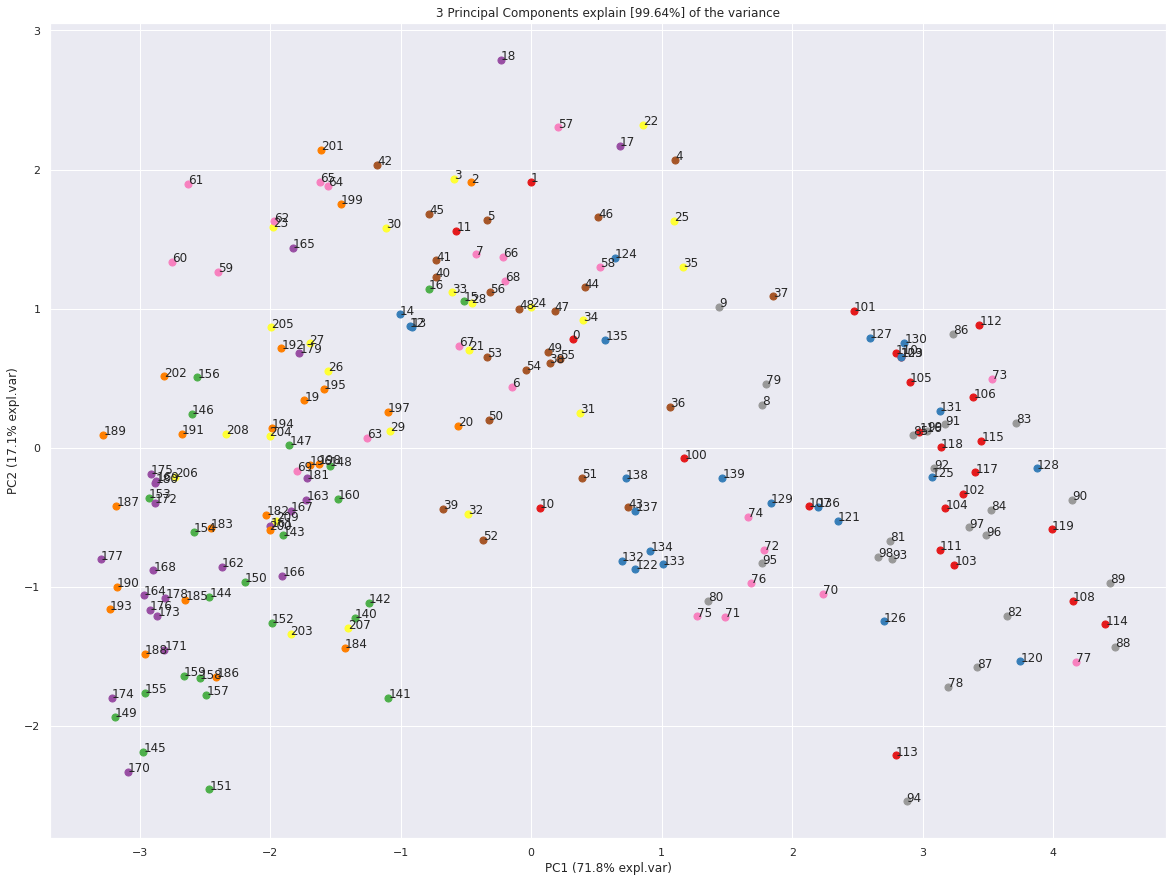

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

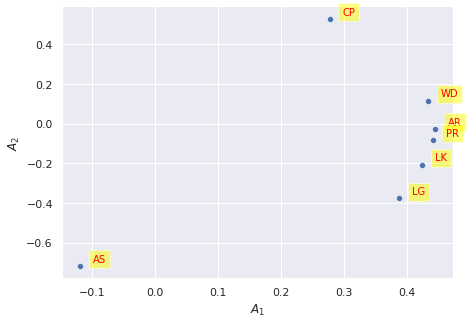

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

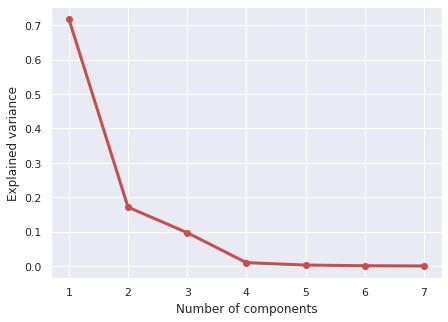

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

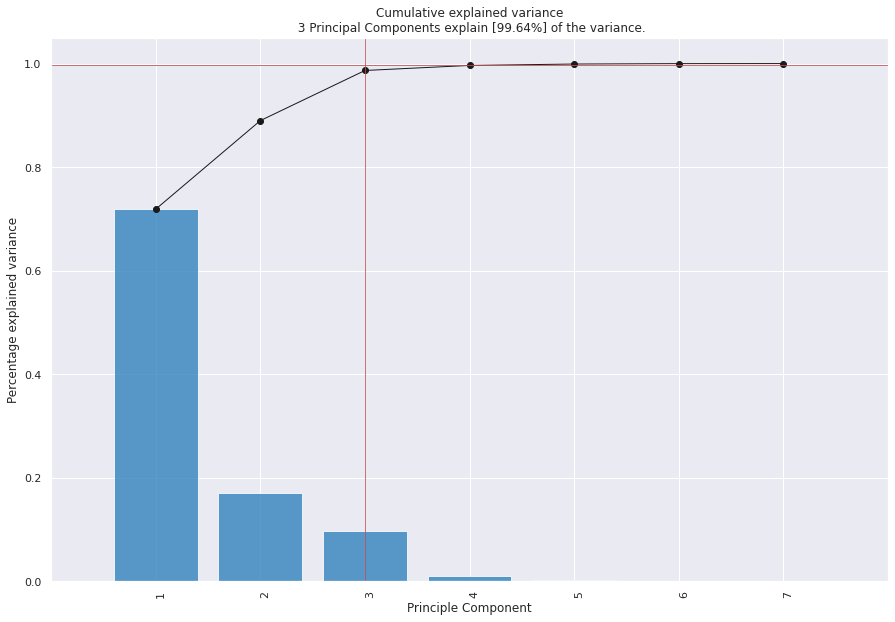

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


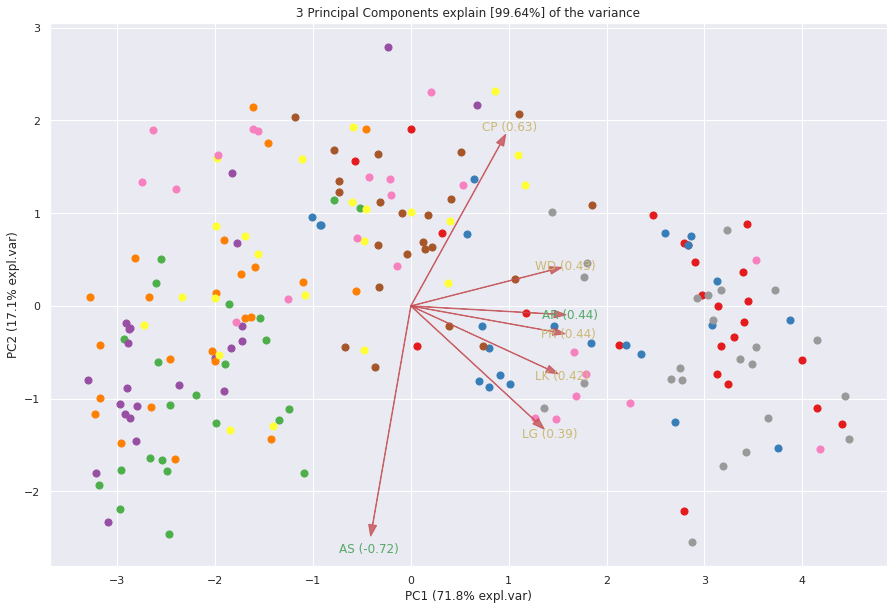

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f33e1a83610>)

In [ ]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


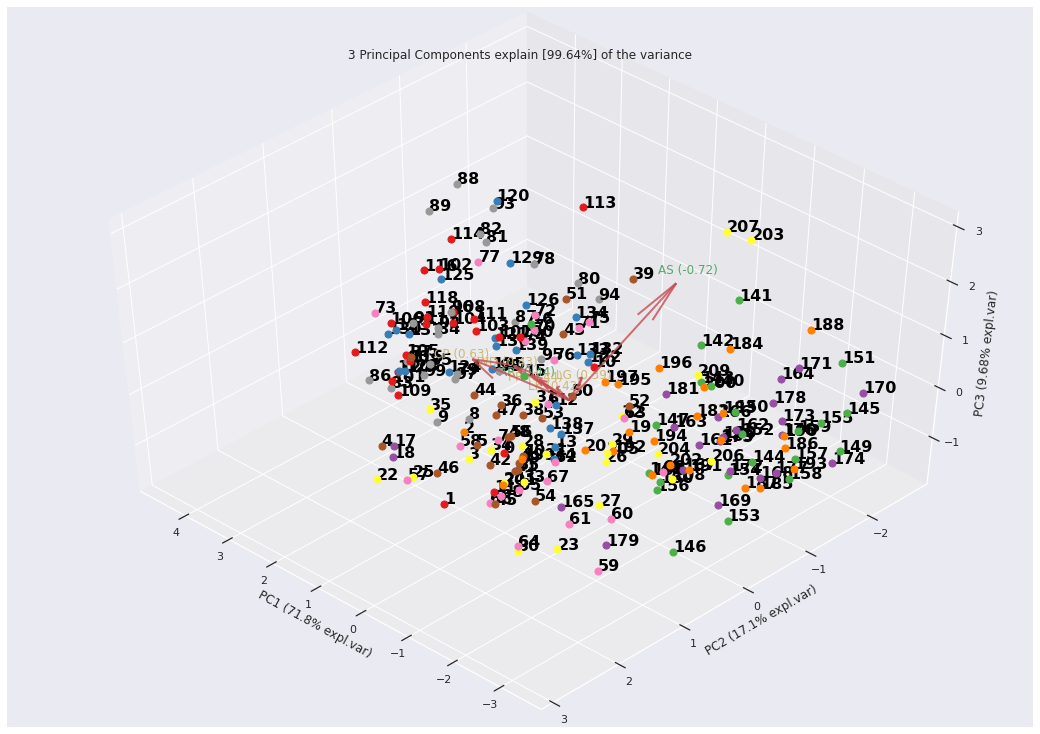

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f33e19d1510>)

In [ ]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (189, 8)
Unseen Data For Predictions: (21, 8)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (189, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (132, 7)
12                    Transformed Test Set           (57, 7)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              7b3e
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lda          Linear Discriminant Analysis    0.9769  0.9991  0.9750  0.9813   
ridge                    Ridge Classifier    0.9615  0.0000  0.9617  0.9677   
qda       Quadratic Discriminant Analysis    0.9473  0.9910  0.9433  0.9571   
et                 Extra Trees Classifier    0.9401  0.9958  0.9350  0.9546   
nb                            Naive Bayes    0.9253  0.9823  0.9200  0.9368   
rf               Random Forest Classifier    0.9253  0.9859  0.9200  0.9399   
dt               Decision Tree Classifier    0.9181  0.9399  0.9167  0.9306   
lr                    Logistic Regression    0.9170  0.9881  0.9133  0.9315   
gbc          Gradient Boosting Classifier    0.9104  0.9796  0.9067  0.9260   
knn                K Neighbors Classifier    0.9093  0.9824  0.9067  0.9227   
lightgbm  Light Gradient Boosting Machine    0.9093  0.9894  0.9033  0.9223   
svm                   SVM - Linear Kernel    0.8165  0.0000  0.8200  0.8812   
ada                  Ada Boost Classifier    0.7264  0.8609  0.7117  0.6288   
dummy                    Dummy Classifier    0.3176  0.5000  0.3333  0.1012   

              F1   Kappa     MCC  TT (Sec)  
lda       0.9765  0.9651  0.9675     0.017  
ridge     0.9613  0.9423  0.9453     0.014  
qda       0.9463  0.9202  0.9256     0.017  
et        0.9373  0.9090  0.9177     0.467  
nb        0.9234  0.8868  0.8934     0.016  
rf        0.9224  0.8866  0.8954     0.472  
dt        0.9168  0.8767  0.8835     0.016  
lr        0.9161  0.8748  0.8818     0.423  
gbc       0.9079  0.8647  0.8737     0.263  
knn       0.9102  0.8637  0.8691     0.119  
lightgbm  0.9086  0.8631  0.8693     0.077  
svm       0.8092  0.7264  0.7588     0.063  
ada       0.6459  0.5832  0.6670     0.110  
dummy     0.1534  0.0000  0.0000     0.015

In [ ]:
best_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [ ]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7143  0.7889  0.7000  0.7143  0.7143  0.5692  0.5692
1       0.9286  0.9500  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  0.9444  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  0.9444  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.9231  0.9375  0.9167  0.9359  0.9211  0.8829  0.8911
7       0.9231  0.9444  0.9333  0.9385  0.9231  0.8850  0.8929
8       0.8462  0.8889  0.8333  0.8974  0.8359  0.7679  0.7968
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9181  0.9399  0.9167  0.9306  0.9168  0.8767  0.8835
SD      0.0819  0.0603  0.0869  0.0792  0.0828  0.1235  0.1215

In [ ]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.8921  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.8571  0.9500  0.8667  0.9048  0.8635  0.7879  0.8062
2       0.9231  0.9359  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.9231  0.9290  0.9167  0.9359  0.9211  0.8829  0.8911
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9231  0.9444  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9407  0.9651  0.9383  0.9554  0.9397  0.9105  0.9181
SD      0.0541  0.0377  0.0573  0.0388  0.0553  0.0816  0.0737

In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [ ]:
!pip install statsmodels --upgrade

How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9286  0.9889  0.9167  0.9405  0.9267  0.8915  0.8985
1       0.8571  0.9813  0.8667  0.9048  0.8635  0.7879  0.8062
2       0.8462  0.9829  0.8333  0.8462  0.8462  0.7679  0.7679
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8462  0.9674  0.8500  0.8615  0.8449  0.7679  0.7748
6       0.9231  0.9375  0.9167  0.9359  0.9211  0.8829  0.8911
7       0.7692  0.9658  0.7667  0.8000  0.7778  0.6549  0.6607
8       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9093  0.9824  0.9067  0.9227  0.9102  0.8637  0.8691
SD      0.0747  0.0195  0.0750  0.0661  0.0727  0.1118  0.1095

**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.9778  0.8667  0.9048  0.8635  0.7879  0.8062
1       0.8571  0.9500  0.8667  0.9048  0.8635  0.7879  0.8062
2       0.8462  0.8889  0.8333  0.8462  0.8462  0.7679  0.7679
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  0.9861  0.9167  0.9359  0.9211  0.8829  0.8911
6       0.9231  0.9375  0.9167  0.9359  0.9211  0.8829  0.8911
7       0.7692  0.8803  0.7667  0.8000  0.7778  0.6549  0.6607
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9176  0.9621  0.9167  0.9327  0.9193  0.8764  0.8823
SD      0.0785  0.0440  0.0789  0.0669  0.0759  0.1174  0.1137

**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.9849  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.9286  0.9849  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  0.9829  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8462  0.9904  0.8500  0.8615  0.8449  0.7679  0.7748
6       0.9231  0.9818  0.9167  0.9359  0.9211  0.8829  0.8911
7       0.7692  0.9562  0.7667  0.8000  0.7778  0.6549  0.6607
8       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9170  0.9881  0.9133  0.9315  0.9161  0.8748  0.8818
SD      0.0717  0.0129  0.0741  0.0613  0.0711  0.1078  0.1041

**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9286  1.0000  0.9167  0.9405  0.9267  0.8915  0.8985
1       0.9286  0.9849  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  0.9904  0.9167  0.9359  0.9211  0.8829  0.8911
6       0.9231  0.9562  0.9167  0.9359  0.9211  0.8829  0.8911
7       0.7692  0.9744  0.7667  0.8000  0.7778  0.6549  0.6607
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9319  0.9897  0.9283  0.9432  0.9319  0.8973  0.9025
SD      0.0638  0.0138  0.0650  0.0551  0.0618  0.0955  0.0935

**Evaluate Logistic Regression Model**

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.9325  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.8571  0.9698  0.8500  0.8571  0.8571  0.7846  0.7846
2       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.8462  0.9733  0.8333  0.8901  0.8333  0.7636  0.7937
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9253  0.9859  0.9200  0.9399  0.9224  0.8866  0.8954
SD      0.0568  0.0208  0.0627  0.0468  0.0602  0.0867  0.0795

**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.8627  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.9286  0.9425  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  0.9316  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.9231  0.9290  0.9167  0.9359  0.9211  0.8829  0.8911
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9231  0.9444  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9478  0.9610  0.9450  0.9592  0.9462  0.9210  0.9275
SD      0.0468  0.0445  0.0522  0.0354  0.0494  0.0713  0.0642

**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9286  1.0000  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9698  0.9991  0.9700  0.9758  0.9695  0.9546  0.9577
SD      0.0370  0.0026  0.0371  0.0296  0.0374  0.0557  0.0519

In [ ]:
tuned_best_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (189, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (132, 3)
12                    Transformed Test Set           (57, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              3651
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.9324  0.9809  0.9300  0.9456   
lr                    Logistic Regression    0.9247  0.9830  0.9217  0.9377   
nb                            Naive Bayes    0.9247  0.9851  0.9217  0.9333   
rf               Random Forest Classifier    0.9247  0.9694  0.9250  0.9415   
lda          Linear Discriminant Analysis    0.9247  0.9865  0.9233  0.9379   
et                 Extra Trees Classifier    0.9176  0.9746  0.9167  0.9322   
lightgbm  Light Gradient Boosting Machine    0.9176  0.9658  0.9150  0.9339   
ridge                    Ridge Classifier    0.9170  0.0000  0.9167  0.9313   
qda       Quadratic Discriminant Analysis    0.9093  0.9850  0.9067  0.9195   
svm                   SVM - Linear Kernel    0.9027  0.0000  0.9017  0.9156   
gbc          Gradient Boosting Classifier    0.8874  0.9664  0.8850  0.8996   
dt               Decision Tree Classifier    0.8868  0.9150  0.8833  0.9126   
ada                  Ada Boost Classifier    0.8516  0.9552  0.8517  0.8977   
dummy                    Dummy Classifier    0.3176  0.5000  0.3333  0.1012   

              F1   Kappa     MCC  TT (Sec)  
knn       0.9307  0.8979  0.9051     0.117  
lr        0.9230  0.8863  0.8934     0.023  
nb        0.9234  0.8864  0.8912     0.018  
rf        0.9229  0.8869  0.8961     0.478  
lda       0.9232  0.8865  0.8936     0.016  
et        0.9158  0.8762  0.8841     0.475  
lightgbm  0.9155  0.8758  0.8847     0.077  
ridge     0.9140  0.8751  0.8842     0.015  
qda       0.9079  0.8632  0.8687     0.017  
svm       0.8996  0.8531  0.8627     0.064  
gbc       0.8863  0.8299  0.8367     0.252  
dt        0.8850  0.8291  0.8425     0.016  
ada       0.8412  0.7775  0.8003     0.109  
dummy     0.1534  0.0000  0.0000     0.014

In [ ]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

In [ ]:
tuned_best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 10.9 MB/s 


In [ ]:
import shap

In [ ]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.8881  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.9286  0.9611  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.8462  0.9487  0.8667  0.8974  0.8423  0.7719  0.8001
7       0.8462  0.9177  0.8500  0.8615  0.8462  0.7699  0.7768
8       0.9231  0.9786  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9247  0.9694  0.9250  0.9415  0.9229  0.8869  0.8961
SD      0.0583  0.0381  0.0588  0.0453  0.0602  0.0875  0.0798

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.9254  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.9286  0.9532  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.8462  0.9904  0.8667  0.8974  0.8423  0.7719  0.8001
7       0.8462  0.9647  0.8500  0.8615  0.8462  0.7699  0.7768
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9247  0.9825  0.9250  0.9415  0.9229  0.8869  0.8961
SD      0.0583  0.0247  0.0588  0.0453  0.0602  0.0875  0.0798

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

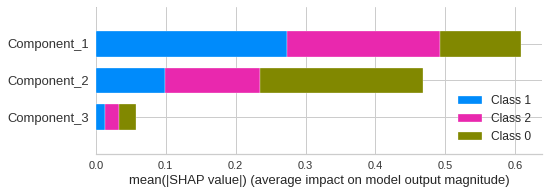

In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')